In [1]:
import typing as t
import numpy as np

In [2]:
class Operation:
    def __init__(self, input_nodes: t.List = []):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in self.input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
    
    def compute(self) -> None:
        raise NotImplemented


class add(Operation):
    def __init__(self, x, y):
        super().__init__([x, y])

    def compute(self, x_var: float, y_var: float) -> float:
        return x_var + y_var


class multiply(Operation):
    def __init__(self, x, y):
        super().__init__([x, y])

    def compute(self, x_var: float, y_var: float) -> float:
        return x_var * y_var


class matmul(Operation):
    def __init__(self, x, y):
        super().__init__([x, y])

    def compute(self, x_var: np.matrix, y_var: np.matrix) -> np.matrix:
        return x_var.dot(y_var)


class PlaceHolder:
    def __init__(self):
        self.output_nodes = []

        _default_graph.placeholders.append(self)


class Variable:
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []

        _default_graph.variables.append(self)


class Graph:
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []

    def set_as_default(self):
        global _default_graph
        
        _default_graph = self

In [3]:
def traverse_postorder(operation):
    nodes_postorder = []
    
    def recur(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recur(input_node)
        nodes_postorder.append(node)
    
    recur(operation)
    
    return nodes_postorder

In [4]:
class Session:
    def run(self, operation: Operation, feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            if isinstance(node, PlaceHolder):
                node.output = feed_dict[node]
            elif isinstance(node, Variable):
                node.output = node.value
            else:
                node.inputs = [input_node.output
                               for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        return operation.output

z = Ax + b

A = 10

b = 1

=> z = 10x + 1

In [5]:
g = Graph()

g.set_as_default()

A = Variable(10)
b = Variable(1)

x = PlaceHolder()

z = add(multiply(A, x), b)

session = Session()

result = session.run(z, {x: 10})

result

101

In [6]:
g = Graph()

g.set_as_default()

A = Variable([[10, 20], [30, 40]])
b = Variable([1, 2])

x = PlaceHolder()

z = add(matmul(A, x), b)

session = Session()

result = session.run(z, {x: 10})

result

array([[101, 202],
       [301, 402]])

# Classification

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
def reLU(x):
    return np.maximum(0, x)

In [10]:
def tanh(x):
    return np.tanh(x)

Text(0,0.5,'prediction')

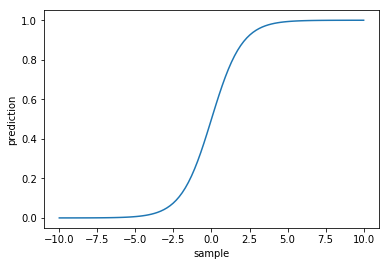

In [11]:
sample = np.linspace(-10, 10, 100)
sample_pre = sigmoid(sample)

plt.plot(sample, sample_pre)
plt.xlabel("sample")
plt.ylabel("prediction")

Text(0,0.5,'prediction')

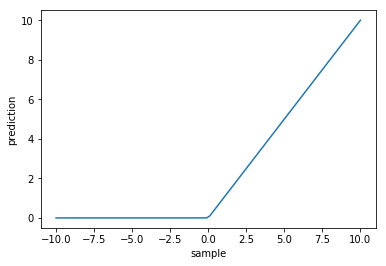

In [12]:
sample = np.linspace(-10, 10, 100)
sample_pre = reLU(sample)

plt.plot(sample, sample_pre)
plt.xlabel("sample")
plt.ylabel("prediction")

Text(0,0.5,'prediction')

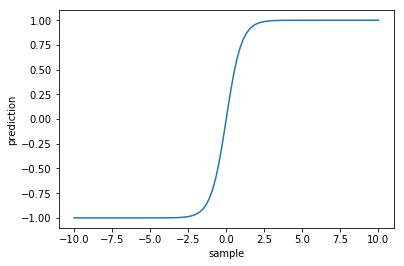

In [13]:
sample = np.linspace(-10, 10, 100)
sample_pre = tanh(sample)

plt.plot(sample, sample_pre)
plt.xlabel("sample")
plt.ylabel("prediction")

In [14]:
class Sigmoid(Operation):
    def __init__(self, z):
        super().__init__([z])
    
    def compute(self, z_val):
        return sigmoid(z_val)


class ReLU(Operation):
    def __init__(self, z):
        super().__init__([z])

    def compute(self, z_val):
        return reLU(z_val)


class Tanh(Operation):
    def __init__(self, z):
        super().__init__([z])

    def compute(self, z_val):
        return tanh(z_val)

In [15]:
from sklearn.datasets import make_blobs

In [16]:
features, labels = make_blobs(n_samples=100, n_features=2, centers=2, random_state=101)

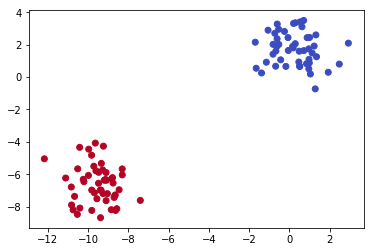

In [17]:
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')

In [18]:
g = Graph()

g.set_as_default()

x = PlaceHolder()
w = Variable([1, 1])
b = Variable(-5)
z = add(matmul(w, x), b)

a = Sigmoid(z)

session = Session()

result = session.run(a, {x: [-10, -4]})

result

5.6027964061459406e-09